경기도청사및출장소현황.csv 파일을 이용하여 다음 문제를 풀어보세요.
1) 도청, 시청, 구청 데이터만 추출하세요. (10)
2) 도로명주소를 이용하여 위도, 경도 좌표를 구하세요. (20)
3) 지도위에 도청, 시청, 구청을 표시하세요. (20)
   단, 도청, 시청, 구청의 마커는 달라야 하고, 마우스를 마커위에 올리면 관공서명이
   표시되고, 클릭하면 전화번호가 표시되도록 하세요. 

In [516]:
import requests
from urllib.parse import quote
import pandas as pd
import json, folium
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [517]:
df = pd.read_csv('data/경기도청사및출장소현황.csv', encoding='euc-kr')

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   집계일자      820 non-null    object 
 1   시군명       820 non-null    object 
 2   구분명       820 non-null    object 
 3   전화번호안내    805 non-null    object 
 4   소재지우편번호   820 non-null    int64  
 5   소재지도로명주소  817 non-null    object 
 6   소재지지번주소   820 non-null    object 
 7   WGS84위도   820 non-null    float64
 8   WGS84경도   820 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 57.8+ KB


In [519]:
df1 = df[df.구분명.str.contains('도청')]
df2 = df[df.구분명.str.contains('시청')]
df3 = df[df.구분명.str.contains('구청')]

In [520]:
df['도청'] = df1['구분명']
df['시청'] = df2['구분명']
df['구청'] = df3['구분명']


In [521]:
df = df[['도청','시청','구청']]

In [522]:
df

,도청,시청,구청
0,NaN,안성시청,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
815,NaN,NaN,NaN
816,NaN,NaN,NaN
817,NaN,NaN,NaN
818,NaN,NaN,NaN


In [523]:
df =df.dropna(how='all')

In [524]:
df.head()

,도청,시청,구청
0,NaN,안성시청,NaN
17,NaN,NaN,단원구청
22,NaN,안산시청,NaN
42,NaN,NaN,상록구청
52,NaN,군포시청,NaN


In [525]:
df2 = pd.read_csv('data/경기도청사및출장소현황.csv', encoding='euc-kr')

In [526]:
df['주소'] = df2['소재지도로명주소']

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_5916\2774715396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주소'] = df2['소재지도로명주소']


In [527]:
df.head()

,도청,시청,구청,주소
0,NaN,안성시청,NaN,경기도 안성시 시청길 25
17,NaN,NaN,단원구청,경기도 안산시 단원구 중앙대로 685 (초지동)
22,NaN,안산시청,NaN,경기도 안산시 단원구 화랑로 387 (고잔동)
42,NaN,NaN,상록구청,경기도 안산시 상록구 석호로 110 (사동)
52,NaN,군포시청,NaN,경기도 군포시 청백리길 6


In [528]:
with open('data/kakaoapikey.txt') as f:
    kakao_key = f.read()

In [529]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '경기도 수원시 영통구 도청로 30 (이의동)'
url = f'{base_url}?query={quote(addr)}'
url


'https://dapi.kakao.com/v2/local/search/address.json?query=%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%88%98%EC%9B%90%EC%8B%9C%20%EC%98%81%ED%86%B5%EA%B5%AC%20%EB%8F%84%EC%B2%AD%EB%A1%9C%2030%20%28%EC%9D%B4%EC%9D%98%EB%8F%99%29'

In [530]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [531]:
result = requests.get(url, headers= header).json()
result

{'documents': [{'address': {'address_name': '경기 수원시 영통구 이의동 0',
    'b_code': '4111710300',
    'h_code': '4111760000',
    'main_address_no': '0',
    'mountain_yn': 'N',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_h_name': '광교1동',
    'region_3depth_name': '이의동',
    'sub_address_no': '',
    'x': '127.053543271',
    'y': '37.2892851628003'},
   'address_name': '경기 수원시 영통구 도청로 30',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '경기 수원시 영통구 도청로 30',
    'building_name': '경기도청',
    'main_building_no': '30',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_name': '이의동',
    'road_name': '도청로',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '127.053543271',
    'y': '37.2892851628003',
    'zone_no': '16508'},
   'x': '127.053543271',
   'y': '37.2892851628003'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [532]:
result.keys()

dict_keys(['documents', 'meta'])

In [533]:
result['documents'][0].keys()

dict_keys(['address', 'address_name', 'address_type', 'road_address', 'x', 'y'])

In [534]:
lat = float(result['documents'][0]['y'])
lng = float(result['documents'][0]['x'])
lat, lng

(37.2892851628003, 127.053543271)

In [535]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df.주소[i])}'
    result = requests.get(url, headers= header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [536]:
df['위도'] = lat_list
df['경도'] = lng_list


C:\Users\YONSAI\AppData\Local\Temp\ipykernel_5916\3947221105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['위도'] = lat_list
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_5916\3947221105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['경도'] = lng_list


In [537]:
map = folium.Map(location=[df.위도.mean(),df.경도.mean()], zoom_start=9)
for i in df.index:
    folium.Marker(
        location=[df.위도[i],df.경도[i]],
        popup=folium.Popup(df.주소[i], max_width=200),
        radius= 300
    ).add_to(map)
title_html = '<h3 align="center" style = "font-size:20px">수원 소재 주요 관공서</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map


문항1] [배점:50]
Seaborn package에 내장되어 있는 mpg 데이터셋에 대해서 다음 문제를 풀어보세요.
1) 실린더별 mpg의 평균을 막대그래프로 그리세요.
2) 배기량(displacement)과 마력(horsepower)의 산점도를 그리세요.
3) name 컬럼으로부터 제조사를 추출하세요.
4) 다음 두 개의 그래프를 한 줄에 두 개가 들어가게 그리세요.
   - 제조사별 모델의 개수(Top 10)를 막대그래프로 그리세요.
   - 제조사별 mpg의 평균(Top 10)을 막대그래프로 그리세요.
                                                           



In [538]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [539]:
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])

In [547]:
mpg['modelname'] = mpg.name.apply(lambda x: x.split()[1:2])
mpg.head(3)

AttributeError: 'list' object has no attribute 'strip'

In [542]:
sns.barplot(x='manufacturer', y=mpg.modelname, data=mpg.head(10))

TypeError: unhashable type: 'list'

c:\Users\YONSAI\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
c:\Users\YONSAI\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
c:\Users\YONSAI\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
c:\Users\YONSAI\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\YONSAI\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\YONSAI\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing fr

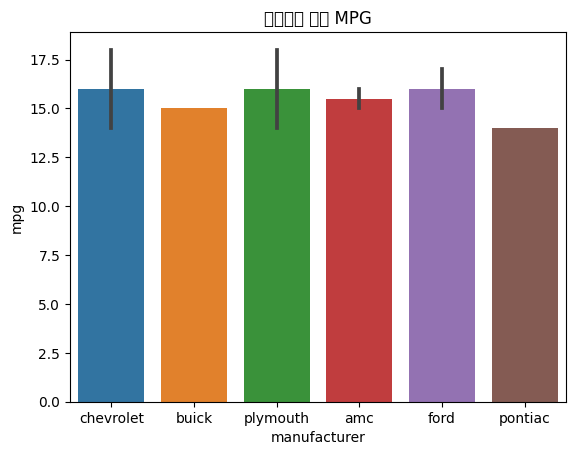

In [ ]:
sns.barplot(x='manufacturer', y='mpg', data=mpg.head(10))
plt.title('제조사별 평균 MPG');

In [ ]:
mpg['modelname'] = mpg.name.apply(lambda x: x.split()[1:])
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer,modelname
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,"[chevelle, malibu]"
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,"[skylark, 320]"
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,[satellite]


In [ ]:
sns.barplot(y='manufacturer', x='modelname', data=mpg.head(10))

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
mpg1 = mpg['displacement']
mpg2 = mpg['horsepower']

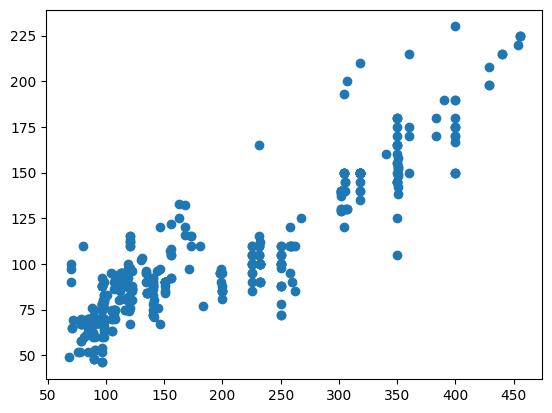

In [ ]:
plt.scatter(mpg1,mpg2,marker='o')

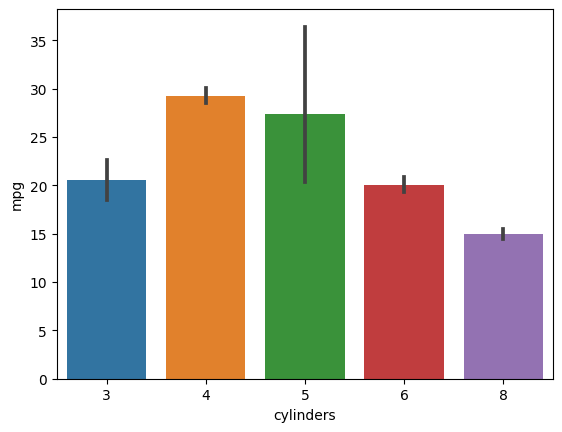

In [ ]:
sns.barplot(x=mpg.cylinders,y=mpg.mpg,data= mpg);